<a href="https://colab.research.google.com/github/GH-Mounir/Fog_D3_js/blob/main/Cell_Towers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
cell_data = pd.read_csv("cell_towers.csv")


In [4]:
cell_data.head()

,Radio,MCC,MNC,Area,Cell,Unit,Longitude,Latitude,Range,Samples,Changeable=0,Created,Updated,AverageSignal
0,GSM,605,1,10006,854,0,10.184097,36.807175,1000,3,1,1459703153,1481914323,0
1,GSM,605,3,1205,24201,0,10.653133,36.419420,1000,16,1,1459811778,1460985891,0
2,GSM,605,1,10017,474,0,10.139694,36.830978,1000,1,1,1459681082,1459681082,0
3,GSM,605,3,414,55783,0,10.158920,36.855698,1000,1,1,1459697022,1459697022,0
4,GSM,605,2,414,56195,0,10.158920,36.855698,1000,2,1,1459718723,1487174360,0


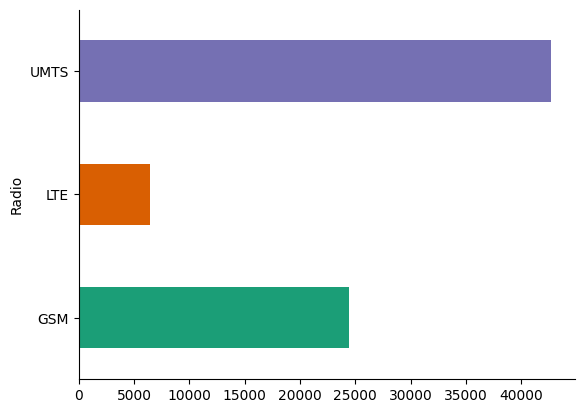

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
cell_data.groupby('Radio').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Create a base map
map_center = [cell_data['Latitude'].mean(), cell_data['Longitude'].mean()]
cell_map = folium.Map(location=map_center, zoom_start=10)

# Create a MarkerCluster for better visualization of multiple markers
marker_cluster = MarkerCluster().add_to(cell_map)

# Add markers for each cell tower with different colors for each MNC
for index, row in cell_data.iterrows():
    color = 'red' if row['MNC'] == 1 else ('green' if row['MNC'] == 2 else 'blue')
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"MNC: {row['MNC']}<br>Cell: {row['Cell']}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# Display the map
cell_map.save('cell_tower_map_with_color.html')

In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Assuming your DataFrame is named cell_data
map_center = [cell_data['Latitude'].mean(), cell_data['Longitude'].mean()]
cell_map = folium.Map(location=map_center, zoom_start=10)

marker_cluster = MarkerCluster().add_to(cell_map)

# Customize layer names for each MNC value
mnc_layers = {
    1: folium.FeatureGroup(name='Orange'),
    2: folium.FeatureGroup(name='Tunisie Telecom'),
    3: folium.FeatureGroup(name='Ooredoo'),
    54: folium.FeatureGroup(name='Other')
}

for index, row in cell_data.iterrows():
    if row['MNC'] == 1:
        color = 'orange'
    elif row['MNC'] == 2:
        color = 'blue'
    elif row['MNC'] == 3:
        color = 'red'
    elif row['MNC'] == 54:
        color = 'green'
    else:
        color = 'black'  # or any other color for unknown MNC values

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"MNC: {row['MNC']}<br>Cell: {row['Cell']}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

    # Add the marker to the corresponding MNC layer
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"MNC: {row['MNC']}<br>Cell: {row['Cell']}",
        icon=folium.Icon(color=color)
    ).add_to(mnc_layers.get(row['MNC'], folium.FeatureGroup(name=f'MNC {row["MNC"]}')))

# Add all layers to the map
for mnc, layer in mnc_layers.items():
    layer.add_to(cell_map)

# Add layer control to the map
folium.LayerControl().add_to(cell_map)

# Save the map as an HTML file
cell_map.save('cell_tower_map_with_custom_layers.html')

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Assuming your DataFrame is named device_df
device_df = device_df.dropna(subset=['lat', 'lng'])  # Drop rows with NaN values in 'lat' or 'lng'

map_center = [device_df['lat'].mean(), device_df['lng'].mean()]  # Set the center of the map

# Create a Folium Map
mymap = folium.Map(location=map_center, zoom_start=15)

# Create a MarkerCluster
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers to the MarkerCluster
for index, row in device_df.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=f"User: {row['user_id']}, View: {row['view_id']}").add_to(marker_cluster)

# Save the map as an HTML file
mymap.save('map_with_clustered_markers.html')